Start searching for the minimum for all three functions ($f$, $g$, $h$) from any number of points (at least 3 - thus, a minimum of 9 runs).

Verify that everything is working as expected by plotting for each run a plot of the change in point coordinates (2D plot) as the gradient descent progresses. All graphs are plotted on three pairs of axes placed vertically on one canvas (their own axes for each function; different runs for one function are depicted on the same axes).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

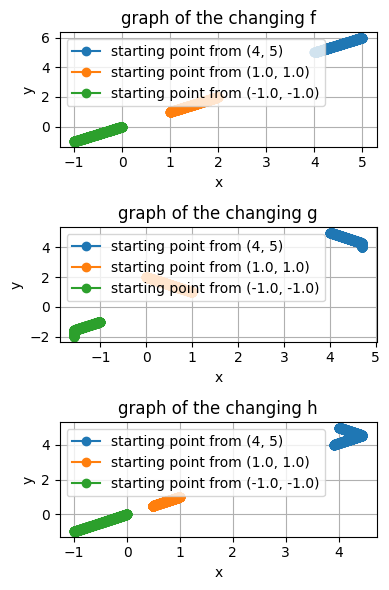

In [7]:
def get_min_with_rmsprop(f, g_f, start, learnrate=0.01, steps=1000, beta=0.9, threshold=1e-6, eps=1e-4):

    x = np.array(start)
    points = [x]
    e_grad = np.zeros_like(x)

    for _ in range(steps):
        grad = g_f(x)
        e_grad = (1 - beta) * e_grad + beta * grad**2
        x = x - learnrate / (np.sqrt(e_grad) + eps) * grad
        points.append(x)

        if np.linalg.norm(grad) < threshold:
            break

    return np.array(points)

def f(xy):
    x, y = xy
    return (x - 6)**2 + (y - 9)**2

def grad_f(xy):
    x, y = xy
    df_dx = 2 * (x - 6)
    df_dy = 2 * (y - 9)
    return np.array([df_dx, df_dy])

def g(xy):
    x, y = xy
    return np.sin(x) + np.cos(y)

def grad_g(xy):
    x, y = xy
    dg_dx = np.cos(x)
    dg_dy = -np.sin(y)
    return np.array([dg_dx, dg_dy])

def h(xy):
    x, y = xy
    return (x**2 - y**2)**2 + (x + y - 1)**2

def grad_h(xy):
    x, y = xy
    dh_dx = 4 * x * (x**2 - y**2) + 2 * (x + y - 1)
    dh_dy = -4 * y * (x**2 - y**2) + 2 * (x + y - 1)
    return np.array([dh_dx, dh_dy])

starting_points = [
    [4, 5],
    [1.0, 1.0],
    [-1.0, -1.0]
]

functions_lists = {
    'f': [f, grad_f],
    'g': [g, grad_g],
    'h': [h, grad_h]
}


def visualize_trajectories(lr, steps, beta, threshold):
    fig, axs = plt.subplots(3, 1, figsize=(4, 6))
    axs = axs.flatten()

    for i, (func_name, (func, grad_func)) in enumerate(functions_lists.items()):
        for start in starting_points:
            points = get_min_with_rmsprop(func, grad_func, start, learnrate=lr, steps=steps, beta=beta, threshold=threshold)
            points = np.array(points)
            xs, ys = points[:, 0], points[:, 1]
            axs[i].plot(xs, ys, marker='o', label=f'starting point from ({start[0]}, {start[1]})')

        axs[i].set_title(f'graph of the changing {func_name}')
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')
        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()

visualize_trajectories(lr=0.001, steps=1000, beta=0.5, threshold=1e-5)


In [5]:
true_minima = {
    'f': [6, 9],
    'g': None,
    'h': [0, 1]
}

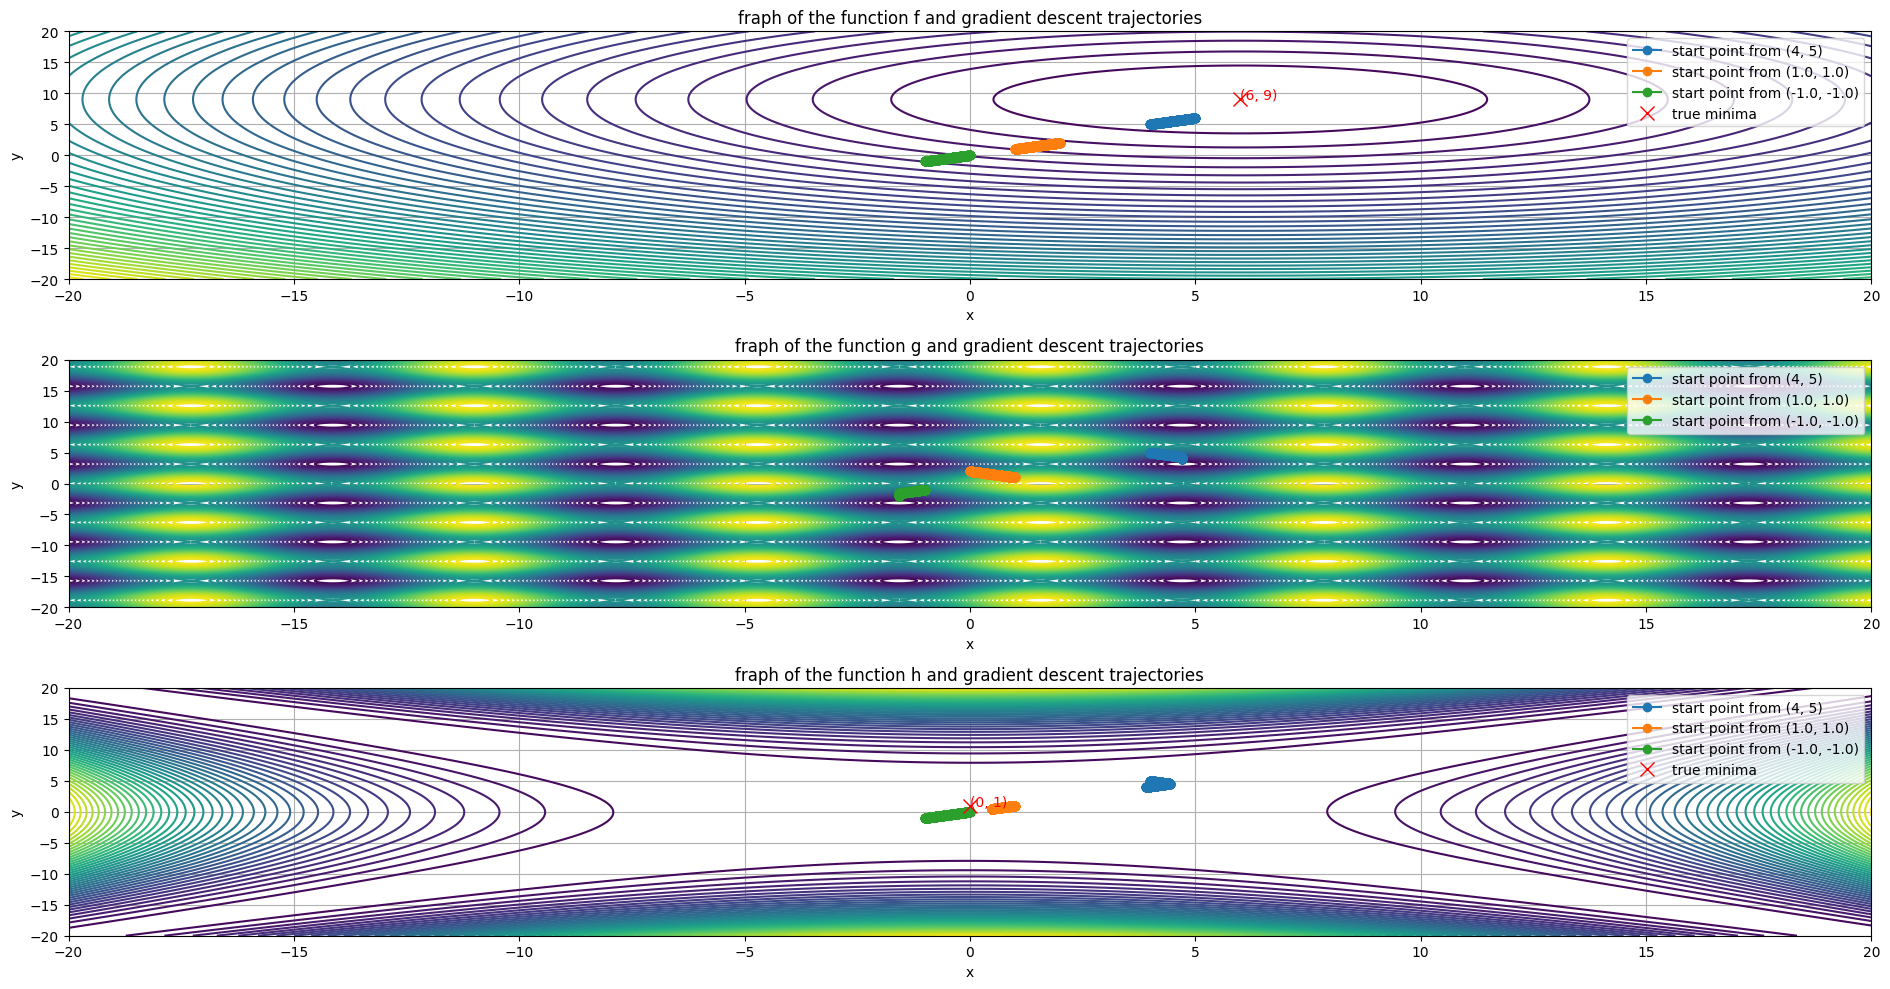

In [9]:
def visualize_trajectories_and_functions(lr, steps, beta, threshold):

    fig, axs = plt.subplots(3, 1, figsize=(19, 10))
    axs = axs.flatten()

    x_range = np.linspace(-20, 20, 400)
    y_range = np.linspace(-20, 20, 400)
    X, Y = np.meshgrid(x_range, y_range)

    for i, (func_name, (func, grad_func)) in enumerate(functions_lists.items()):
        Z = np.array([func([x, y]) for x, y in zip(np.ravel(X), np.ravel(Y))])
        Z = Z.reshape(X.shape)

        axs[i].contour(X, Y, Z, levels=50, cmap='viridis')
        axs[i].set_title(f'fraph of the function {func_name} and gradient descent trajectories')
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')

        for start in starting_points:
            points = get_min_with_rmsprop(func, grad_func, start, learnrate=lr, steps=steps, beta=beta, threshold=threshold)
            points = np.array(points)
            xs, ys = points[:, 0], points[:, 1]
            axs[i].plot(xs, ys, marker='o', label=f'start point from ({start[0]}, {start[1]})')

        if true_minima[func_name]:
            min_x, min_y = true_minima[func_name]
            axs[i].plot(min_x, min_y, 'rx', markersize=10, label='true minima')
            axs[i].text(min_x, min_y, f'({min_x}, {min_y})', color='red')

        axs[i].legend()
        axs[i].grid(True)

    plt.tight_layout()
    plt.show()


visualize_trajectories_and_functions(lr=0.001, steps=1000, beta=0.5, threshold=1e-5)

In [10]:
def func_5d(x):
    return np.sum((x - np.array([1, 2, 3, 4, 5]))**2)

def grad_func_5d(x):
    return 2 * (x - np.array([1, 2, 3, 4, 5]))

In [15]:
start_point = np.array([10, 10, 10, 10, 10])


In [14]:
points = get_min_with_rmsprop(func_5d, grad_func_5d, start_point, learnrate=0.001, steps=10000, beta=0.9, threshold=1e-6)


In [13]:
final_point = points[-1]
print("final point:", final_point)

final point: [0.99955 1.99955 2.99955 3.99955 4.99955]


As we see the method converges to the true minima